# Decision Tree Project 2: `make_moons` dataset



`sklearn` includes various random sample generators that can be used to build artificial datasets of controlled size and complexity. We are going to use `make_moons` in this section. More details can be found [here](https://scikit-learn.org/stable/datasets/sample_generators.html).

 `make_moons` generate 2d binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise. `make_moons` produces two interleaving half circles. It is useful for visualization. 

 Let us explorer the dataset first.

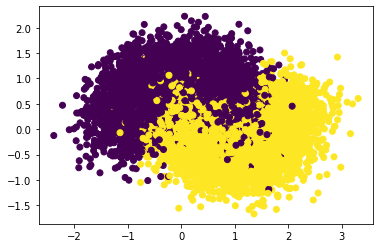

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

Now we are applying `sklearn.DecisionTreeClassifier` to construct the decision tree. The steps are as follows.
1. Split the dataset into training data and test data. 
2. Construct the pipeline. Since we won't apply any transformers there for this problem, we may just use the classifier `sklearn.DecisionTreeClassifier` directly without really construct the pipeline object.
3. Consider the hyperparameter space for grid search. For this problme we choose `min_samples_split` and `max_leaf_nodes` as the hyperparameters we need. We will let `min_samples_split` run through 2 to 5, and `max_leaf_nodes` run through 2 to 50. We will use `grid_search_cv` to find the best hyperparameter for our model. For cross-validation, the number of split is set to be `3` which means that we will run trainning 3 times for each pair of hyperparameters.
4. Run `grid_search_cv`. Find the best hyperparameters and the best estimator. Test it on the test set to get the accuracy score.

In [2]:
# Step 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Step 3
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

params = {'min_samples_split': list(range(2, 5)),
          'max_leaf_nodes': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [4]:
# Step 4
from sklearn.metrics import accuracy_score

clf = grid_search_cv.best_estimator_
print(grid_search_cv.best_params_)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

{'max_leaf_nodes': 17, 'min_samples_split': 2}


0.8695

Now you can see that for this `make_moons` dataset, the best decision tree should have at most `17` leaf nodes and the minimum number of samples required to be at a leaft node is `2`. The fitted decision tree can get 86.95% accuracy on the test set. 

Now we can plot the decision tree and the decision surface.

[Text(0.5340909090909091, 0.9375, 'X[1] <= 0.296\ngini = 0.5\nsamples = 8000\nvalue = [3987, 4013]'),
 Text(0.25, 0.8125, 'X[0] <= -0.476\ngini = 0.367\nsamples = 4275\nvalue = [1036, 3239]'),
 Text(0.09090909090909091, 0.6875, 'X[0] <= -0.764\ngini = 0.183\nsamples = 472\nvalue = [424, 48]'),
 Text(0.045454545454545456, 0.5625, 'gini = 0.035\nsamples = 333\nvalue = [327, 6]'),
 Text(0.13636363636363635, 0.5625, 'X[1] <= 0.047\ngini = 0.422\nsamples = 139\nvalue = [97, 42]'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.496\nsamples = 70\nvalue = [38, 32]'),
 Text(0.18181818181818182, 0.4375, 'gini = 0.248\nsamples = 69\nvalue = [59, 10]'),
 Text(0.4090909090909091, 0.6875, 'X[1] <= -0.062\ngini = 0.27\nsamples = 3803\nvalue = [612, 3191]'),
 Text(0.3181818181818182, 0.5625, 'X[1] <= -0.371\ngini = 0.147\nsamples = 2426\nvalue = [194, 2232]'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.079\nsamples = 1336\nvalue = [55, 1281]'),
 Text(0.36363636363636365, 0.4375, 'gini = 0.223\nsamples

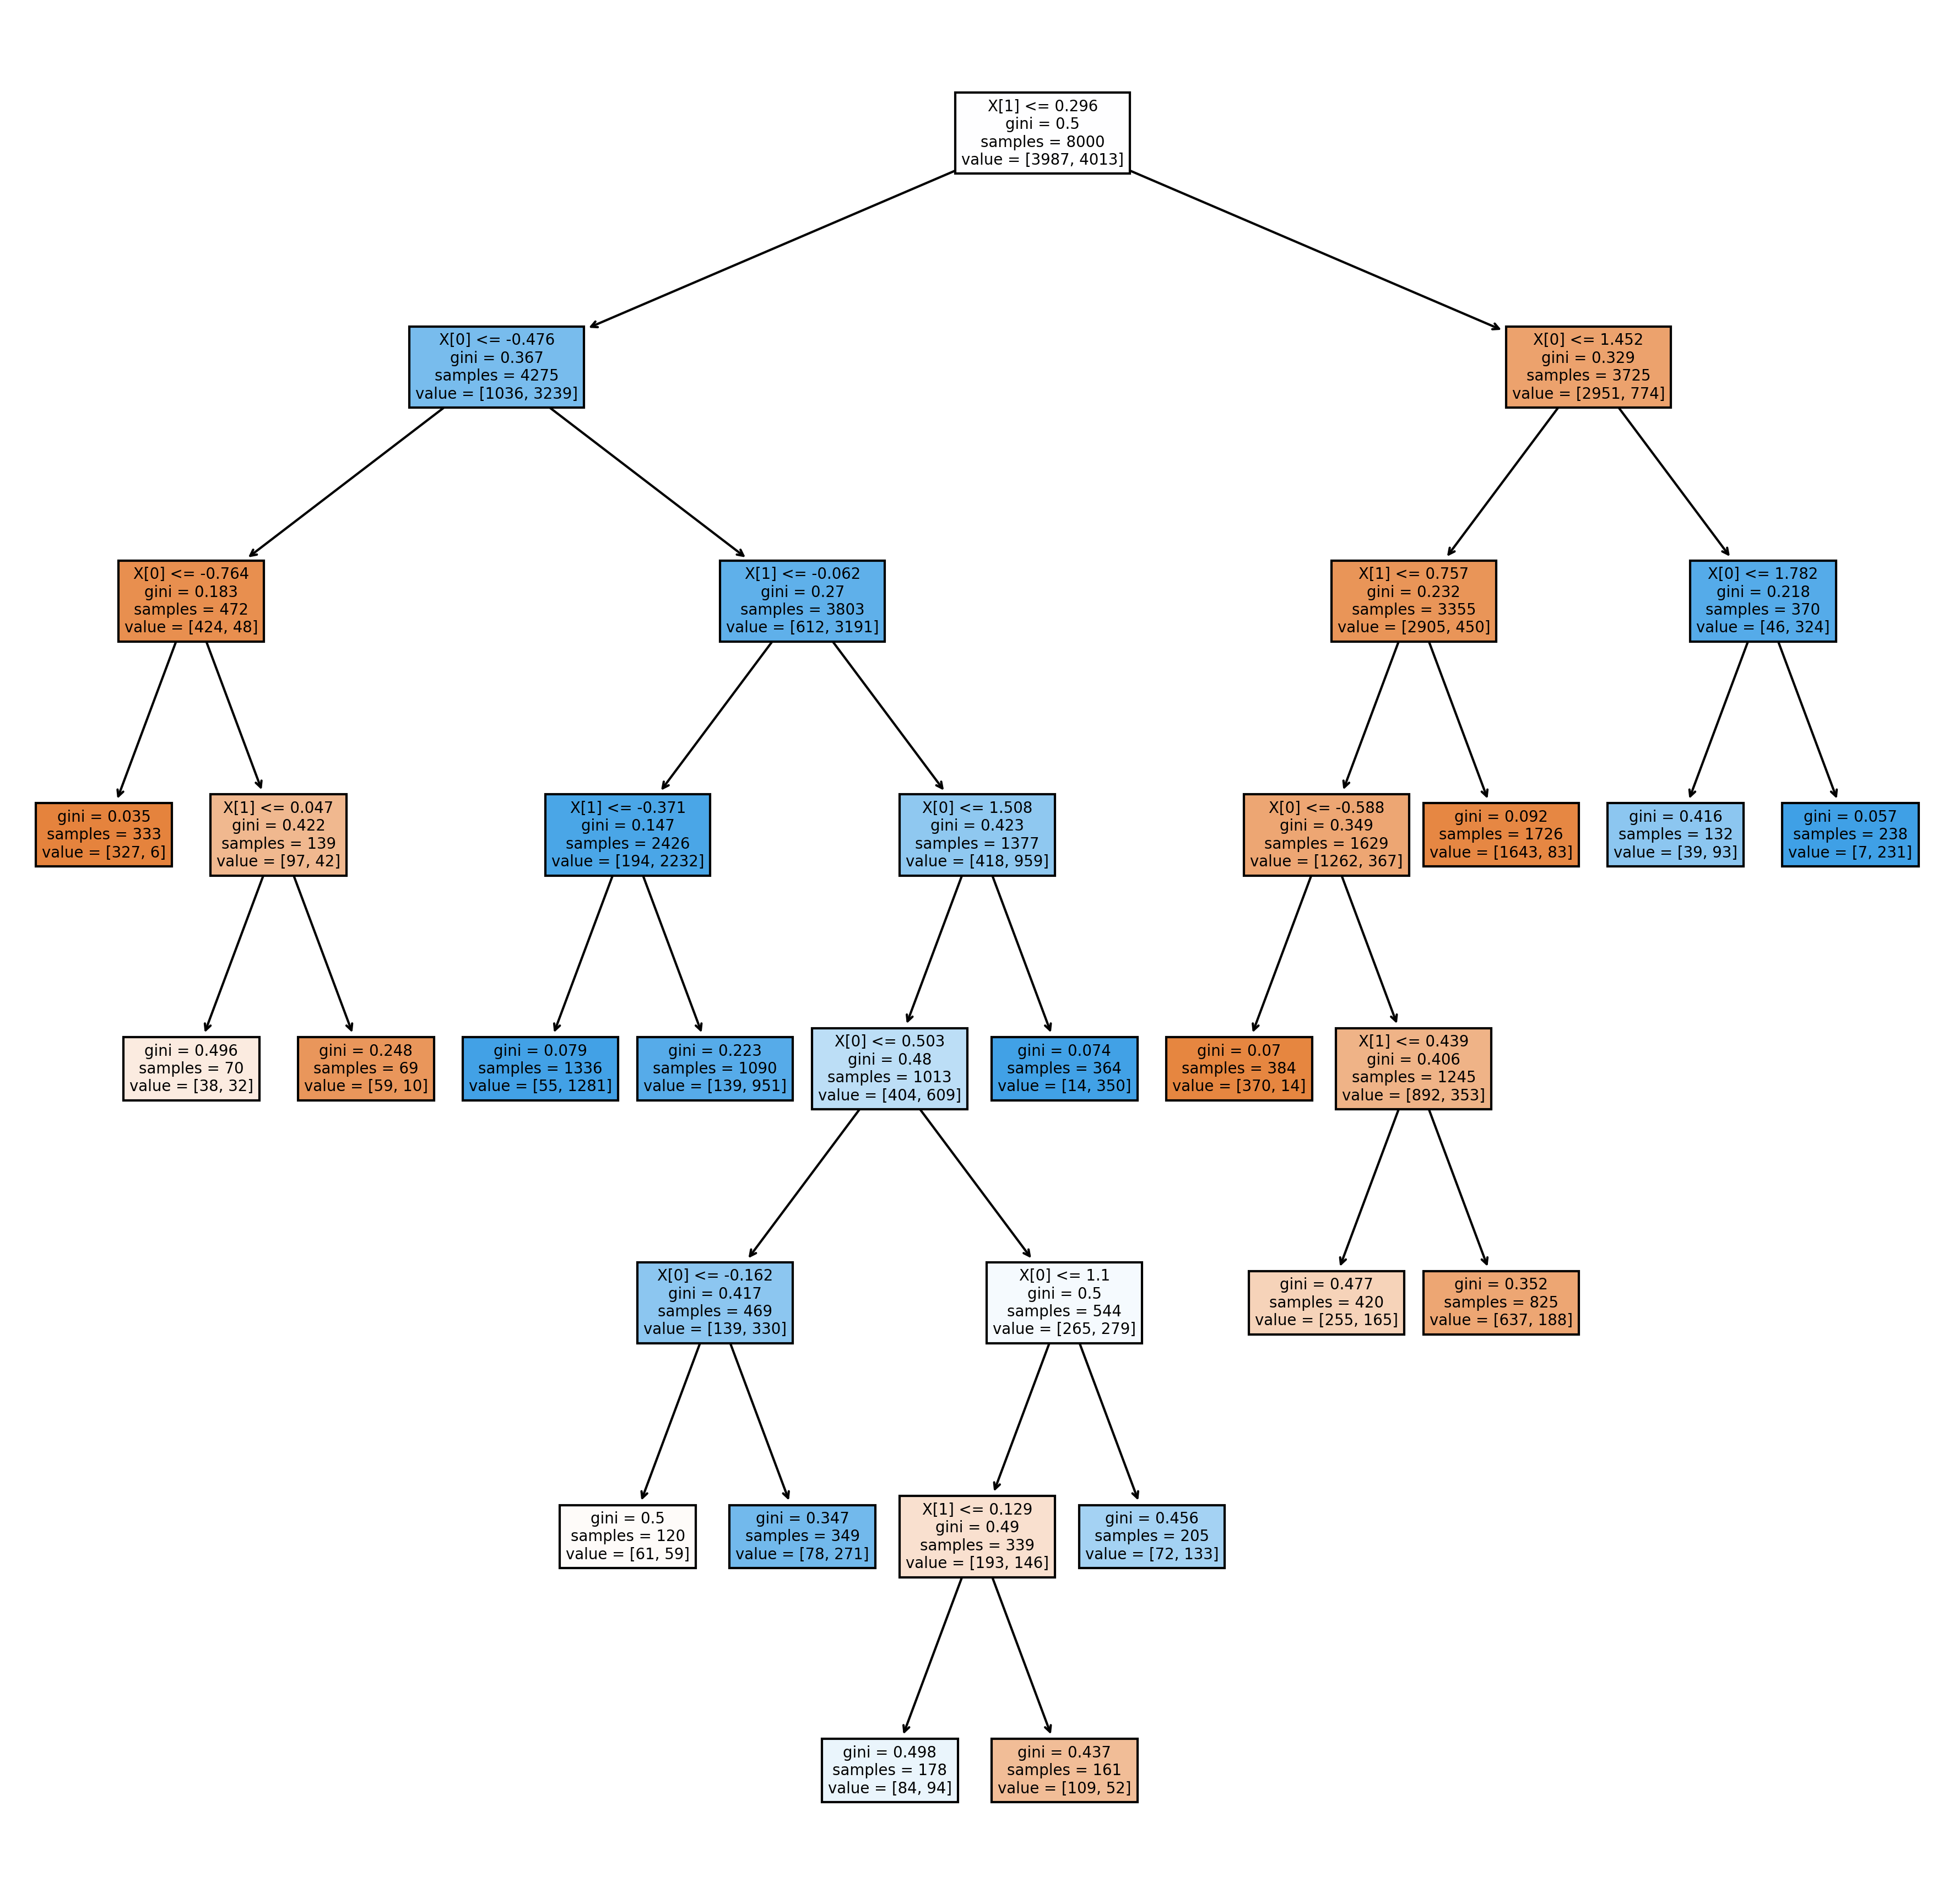

In [5]:
from sklearn import tree
plt.figure(figsize=(15, 15), dpi=300)
tree.plot_tree(clf, filled=True)


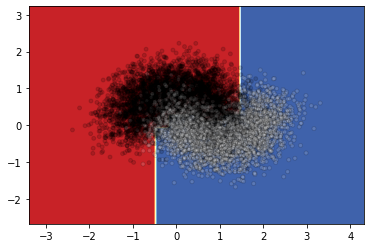

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict"
)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap='gray',
    edgecolor="black",
    s=15,
    alpha=.15)

Since it is not very clear what the boundary looks like, I will draw the decision surface individually below.

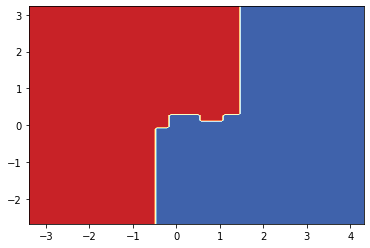

In [7]:
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict"
)